In [ ]:
from google.colab import drive
drive .mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from tensorflow.keras.regularizers import l2
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing import image
from keras.preprocessing import sequence
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.applications.densenet import preprocess_input
from keras.applications.densenet import DenseNet
from keras.applications.densenet import DenseNet121
import itertools 
from keras.layers import Embedding
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2

from keras.datasets import imdb
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from keras import backend as K
import tensorflow as tf
from glob import glob
import numpy as np
import PIL.Image
import PIL
import cv2
import os


In [ ]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
img=image.load_img("/content/drive/MyDrive/Datatset/Bell Pepper Dataset/Test/Bacterial_spot/018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG")

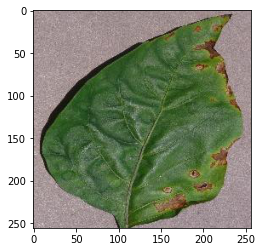

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/Datatset/Bell Pepper Dataset/Test/Bacterial_spot/018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG").shape

(256, 256, 3)

In [ ]:
cv2.imread("/content/drive/MyDrive/Datatset/Bell Pepper Dataset/Test/Bacterial_spot/018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG")

array([[[141, 140, 156],
        [143, 142, 158],
        [137, 136, 152],
        ...,
        [158, 155, 171],
        [146, 143, 159],
        [150, 147, 163]],

       [[158, 157, 173],
        [171, 170, 186],
        [153, 152, 168],
        ...,
        [156, 153, 169],
        [148, 145, 161],
        [154, 151, 167]],

       [[116, 115, 131],
        [150, 149, 165],
        [149, 148, 164],
        ...,
        [157, 154, 170],
        [150, 147, 163],
        [159, 156, 172]],

       ...,

       [[163, 160, 175],
        [170, 167, 182],
        [151, 148, 163],
        ...,
        [140, 134, 151],
        [149, 143, 160],
        [149, 143, 160]],

       [[151, 148, 163],
        [150, 147, 162],
        [123, 120, 135],
        ...,
        [140, 134, 151],
        [157, 151, 168],
        [144, 138, 155]],

       [[141, 138, 153],
        [151, 148, 163],
        [157, 154, 169],
        ...,
        [154, 148, 165],
        [174, 168, 185],
        [148, 142, 159]]

In [ ]:
train= ImageDataGenerator(rescale=1/255)

valid=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)


In [ ]:
trainpath='/content/drive/MyDrive/Datatset/Bell Pepper Dataset/Train'
validpath='/content/drive/MyDrive/Datatset/Bell Pepper Dataset/Validation'
testpath='/content/drive/MyDrive/Datatset/Bell Pepper Dataset/Test'

In [ ]:
train_dataset=train.flow_from_directory(trainpath, 
                                                        target_size=(224,224),
                                                         batch_size=32,
                                                        class_mode='binary')

valid_dataset=valid.flow_from_directory(validpath,
                                                        target_size=(224,224),
                                                         batch_size=32,
                                                        class_mode='binary')

test_dataset=test.flow_from_directory(testpath,
                                                        target_size=(224,224),
                                                         batch_size=32,
                                                        class_mode='binary')

Found 2687 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
Found 674 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2, 2))

model.add(Dropout(0.4))
model.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))



model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [ ]:
matrics_accuracy=tf.keras.metrics.BinaryAccuracy()
metrics_precision = tf.keras.metrics.Precision()
metrics_recall = tf.keras.metrics.Recall()
metrics_f1score=tfa.metrics.F1Score(num_classes=4, average="micro")
metrics_auc=tf.keras.metrics.AUC()


In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=[matrics_accuracy,metrics_precision,metrics_recall,metrics_f1score,metrics_auc])

In [ ]:

history=model.fit( train_dataset, epochs=50, steps_per_epoch=84, validation_data=(valid_dataset), validation_steps=17)

Epoch 1/50
84/84 [==============================] - 764s 9s/step - loss: 1.0577 - binary_accuracy: 0.5586 - precision: 0.5502 - recall: 0.7741 - f1_score: 0.6790 - auc: 0.6009 - val_loss: 0.6888 - val_binary_accuracy: 0.8593 - val_precision: 0.8674 - val_recall: 0.8481 - val_f1_score: 0.6667 - val_auc: 0.9410
Epoch 2/50
84/84 [==============================] - 15s 175ms/step - loss: 0.4386 - binary_accuracy: 0.8128 - precision: 0.7966 - recall: 0.8537 - f1_score: 0.6790 - auc: 0.8904 - val_loss: 0.4030 - val_binary_accuracy: 0.8593 - val_precision: 0.9181 - val_recall: 0.7889 - val_f1_score: 0.6667 - val_auc: 0.9494
Epoch 3/50
84/84 [==============================] - 15s 174ms/step - loss: 0.2751 - binary_accuracy: 0.8843 - precision: 0.8757 - recall: 0.9030 - f1_score: 0.6790 - auc: 0.9585 - val_loss: 0.2907 - val_binary_accuracy: 0.9056 - val_precision: 0.9261 - val_recall: 0.8815 - val_f1_score: 0.6667 - val_auc: 0.9686
Epoch 4/50
84/84 [==============================] - 14s 172ms/s

In [ ]:
valid_score = model.evaluate_generator(valid_dataset, steps=2, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(valid_score[1] * 100)) 
print("[INFO] Loss: ",valid_score[0])
print("[INFO] precision: ",valid_score[2])
print("[INFO] recall: ",valid_score[3])
print("[INFO] f-score: ",valid_score[4])
print("[INFO] AUC: ",valid_score[3])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


2/2 [==============================] - 0s 133ms/step - loss: 0.0508 - binary_accuracy: 0.9688 - precision: 1.0000 - recall: 0.9231 - f1_score: 0.6190 - auc: 0.9990
[INFO] accuracy: 96.88%
[INFO] Loss:  0.05080871656537056
[INFO] precision:  1.0
[INFO] recall:  0.9230769276618958
[INFO] f-score:  0.6190476417541504
[INFO] AUC:  0.9230769276618958


In [ ]:
test_score = model.evaluate_generator(test_dataset, steps=2, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])
print("[INFO] Precision: ",test_score[2])
print("[INFO] Recall: ",test_score[3])
print("[INFO] f1-score: ",test_score[4])
print("[INFO] AUC: ",test_score[5])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


2/2 [==============================] - 8s 8s/step - loss: 0.1624 - binary_accuracy: 0.9688 - precision: 1.0000 - recall: 0.9459 - f1_score: 0.7872 - auc: 0.9835
[INFO] accuracy: 96.88%
[INFO] Loss:  0.16236397624015808
[INFO] Precision:  1.0
[INFO] Recall:  0.9459459185600281
[INFO] f1-score:  0.7872340679168701
[INFO] AUC:  0.9834834337234497


In [ ]:
train_score = model.evaluate_generator(train_dataset,steps=2, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(train_score[1] * 100)) 

print("[INFO] Loss: ",train_score[0])

print("[INFO] Precision: ",train_score[2])
print("[INFO] Recall: ",train_score[3])
print("[INFO] f1-score: ",train_score[4])
print("[INFO] AUC: ",train_score[5])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


2/2 [==============================] - 0s 152ms/step - loss: 0.0258 - binary_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - f1_score: 0.7708 - auc: 1.0000
[INFO] accuracy: 100.00%
[INFO] Loss:  0.02580193057656288
[INFO] Precision:  1.0
[INFO] Recall:  1.0
[INFO] f1-score:  0.7708333730697632
[INFO] AUC:  0.9999999403953552


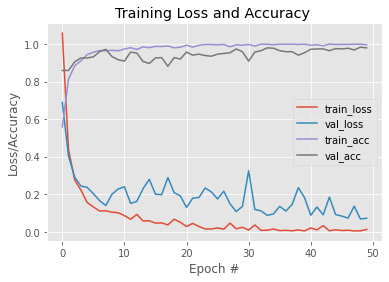

In [ ]:
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["binary_accuracy"], label="train_acc")
plt.plot(N, history.history["val_binary_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy ")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")

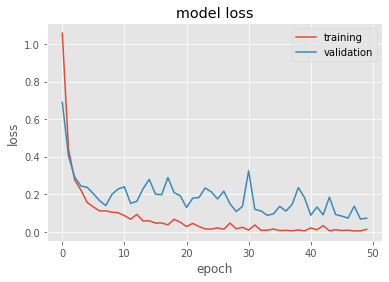

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

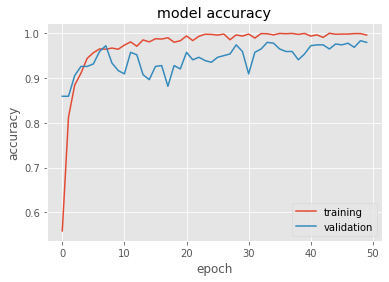

In [ ]:


plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Datatset/Bell Pepper Dataset/Test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary') 

Found 674 images belonging to 2 classes.


In [ ]:
true_classes = test_generator.classes

y_pred = model.predict(test_generator, steps=22, verbose=1).round()


print(classification_report(true_classes, y_pred.round()))


22/22 [==============================] - 3s 118ms/step
              precision    recall  f1-score   support

           0       0.48      0.58      0.53       337
           1       0.47      0.38      0.42       337

    accuracy                           0.48       674
   macro avg       0.48      0.48      0.47       674
weighted avg       0.48      0.48      0.47       674



In [ ]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_pred

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sn
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    recall=recall_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1Score : {}".format(f1Score))
   
    cm=confusion_matrix(y_true, y_pred)
   
    plt.figure(figsize = (7,5))
    sn.heatmap( cm, annot=True,cmap="OrRd")
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    print(cm)
    return accuracy, precision,  recall, f1Score

Accuracy  : 0.4792284866468843
Precision : 0.47831960885229025
Recall : 0.4792284866468843
f1Score : 0.47371277932883227
[[196 141]
 [210 127]]


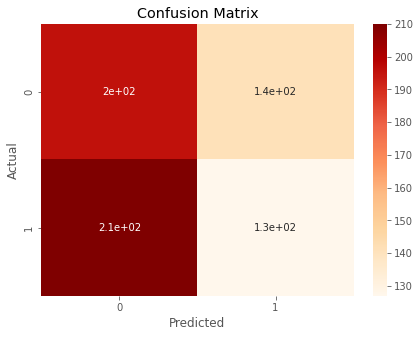

In [ ]:
testAcc,testPrec,testrecall, testFScore = my_metrics(true_classes, y_pred.round())

In [ ]:
test_path='/content/drive/MyDrive/Datatset/Bell Pepper Prediction'

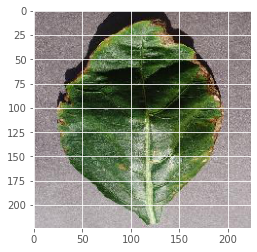

Predicted: Bactorial Spot


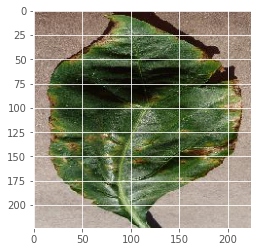

Predicted: Bactorial Spot


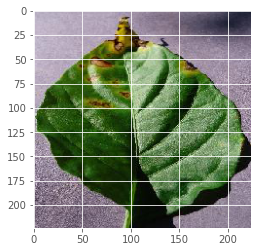

Predicted: Bactorial Spot


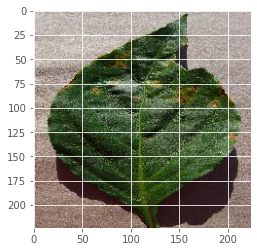

Predicted: Bactorial Spot


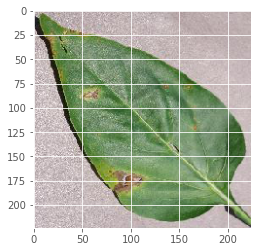

Predicted: Bactorial Spot


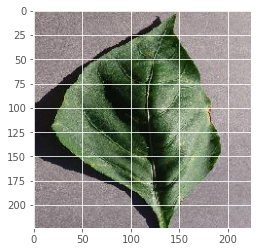

Predicted: Bactorial Spot


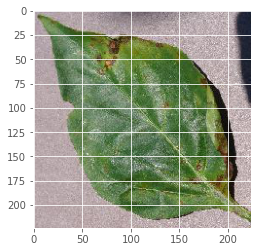

Predicted: Bactorial Spot


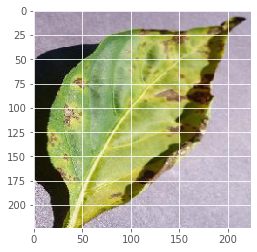

Predicted: Bactorial Spot


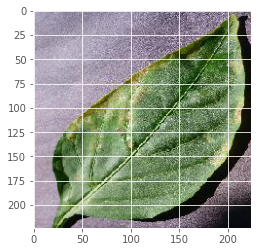

Predicted: Bactorial Spot


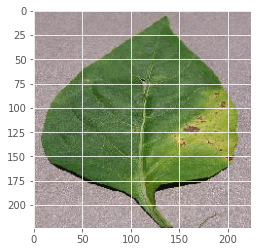

Predicted: Bactorial Spot


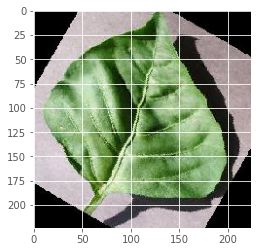

Predicted: Bactorial Spot


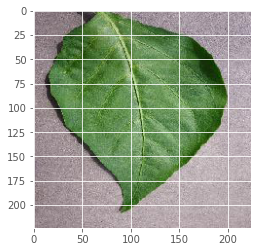

Predicted: Bactorial Spot


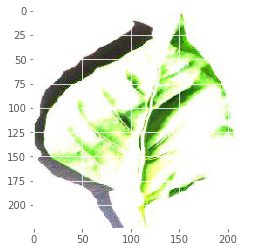

Predicted: Bactorial Spot


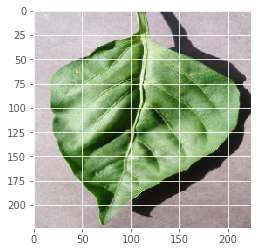

Predicted: Bactorial Spot


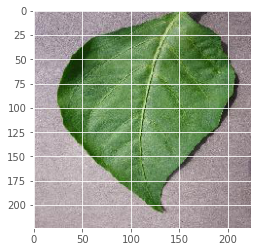

Predicted: Bactorial Spot


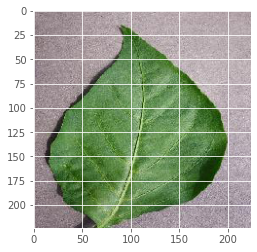

Predicted: Bactorial Spot


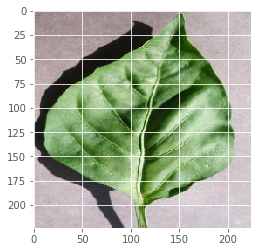

Predicted: Bactorial Spot


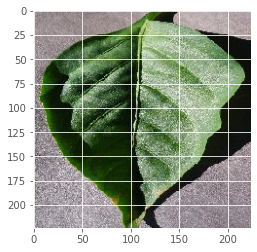

Predicted: Bactorial Spot


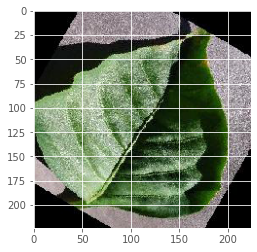

Predicted: Bactorial Spot


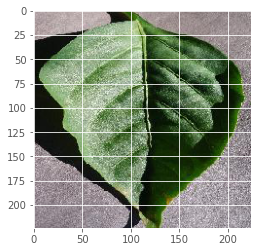

Predicted: Bactorial Spot


In [ ]:
for i in os.listdir(test_path):
  img=image.load_img(test_path+'//'+i,target_size=(224,224))
  plt.imshow(img)
  plt.show()

  X=image.img_to_array(img)
  X=np.expand_dims(X, axis=0)
  images=np.vstack([X])
  array=model.predict(images)
  result = array[0]
  #print(result)
  answer = np.argmax(result)
  if answer == 0:
    print("Predicted: Bactorial Spot")
  elif answer == 1:
    print("Predicted: Healthy")
  